Projede, siyah-beyaz manga resimlerini renkli hale getirmek için Pix2PixHD modelinden yararlanılmaktadır. Pix2PixHD, yüksek kaliteli görüntü dönüşümleri sağlamak üzere NVIDIA tarafından geliştirilmiş bir GAN modelidir. Modeli geniş bir manga veri seti ile eğiterek gerçekçi ve doğru bir şekilde renklendirilmiş maga resimleri üretmeyi hedeflemektedir.

# Drive'a Bağlan


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Proje klasörünü oluştur ve Hugging Face'ten veri setini çek

Drive'da proje dosyası oluşturur ve Hugging Face'ten manga veri setini yükler ve siyah-beyaz ile renkli resimleri train ve val diye bölünerek oluşturulan klasörlere kaydeder.



In [6]:
!pip3 install datasets

import os
from PIL import Image
from datasets import load_dataset
import random

os.makedirs('/content/drive/MyDrive/cycle_gan', exist_ok=True)

%cd /content/drive/MyDrive/cycle_gan

# Veri setini yükle
dataset = load_dataset("MichaelP84/manga-colorization-dataset")

# Klasör yolları
output_train_A_path = '/content/drive/MyDrive/cycle_gan/trainA'
output_train_B_path = '/content/drive/MyDrive/cycle_gan/trainB'
output_val_A_path = '/content/drive/MyDrive/cycle_gan/valA'
output_val_B_path = '/content/drive/MyDrive/cycle_gan/valB'

# Klasörleri oluştur
os.makedirs(output_train_A_path, exist_ok=True)
os.makedirs(output_train_B_path, exist_ok=True)
os.makedirs(output_val_A_path, exist_ok=True)
os.makedirs(output_val_B_path, exist_ok=True)

image_count = 1

examples = list(dataset['train'])

# %90 eğitim ve %10 doğrulama verisi ayır
split_index = int(0.9 * len(examples))
train_examples = examples[:split_index]
val_examples = examples[split_index:]

# Eğitim setini işleyin
for example in train_examples:
    # Siyah-beyaz resimleri kaydet
    bw_image = example['bw_image']
    bw_img_filename = os.path.join(output_train_A_path, f"{image_count}.jpg")
    bw_image.save(bw_img_filename, 'JPEG')

    # Renkli resimleri kaydet
    color_image = example['color_image']
    color_img_filename = os.path.join(output_train_B_path, f"{image_count}.jpg")
    color_image.save(color_img_filename, 'JPEG')

    image_count += 1

# Doğrulama setini işleyin
for example in val_examples:
    # Siyah-beyaz resimleri kaydet
    bw_image = example['bw_image']
    bw_img_filename = os.path.join(output_val_A_path, f"{image_count}.jpg")
    bw_image.save(bw_img_filename, 'JPEG')

    # Renkli resimleri kaydet
    color_image = example['color_image']
    color_img_filename = os.path.join(output_val_B_path, f"{image_count}.jpg")
    color_image.save(color_img_filename, 'JPEG')

    image_count += 1

print("Veri seti işleme ve ayırma tamamlandı.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/400 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

train-00000-of-00043.parquet:   0%|          | 0.00/520M [00:00<?, ?B/s]

train-00001-of-00043.parquet:   0%|          | 0.00/492M [00:00<?, ?B/s]

train-00002-of-00043.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

train-00003-of-00043.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00043.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

train-00005-of-00043.parquet:   0%|          | 0.00/503M [00:00<?, ?B/s]

train-00006-of-00043.parquet:   0%|          | 0.00/484M [00:00<?, ?B/s]

train-00007-of-00043.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

train-00008-of-00043.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

train-00009-of-00043.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

KeyboardInterrupt: 

# pytorch-CycleGAN-and-pix2pix deposunu klonla ve gereksinimleri yükle


In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

%cd pytorch-CycleGAN-and-pix2pix

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408195 sha256=2ef25f97016a0ff40a29e350e4765986ced7a4b37510c4b1494b7fca5f567841
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


# Eğitime başla

Eğitim sırasında oluşturulan görseller "/content/drive/MyDrive/cycle_gan/pytorch-CycleGAN-and-pix2pix/checkpoints/colorization_cyclegan/web/images" klasörünün içinmde yer alıyor

In [ ]:
!python train.py --dataroot "/content/drive/MyDrive/cycle_gan/img" --name "colorization_cyclegan" --model "cycle_gan" --direction "AtoB"


----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Colab_Notebooks/img	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
  

# Eğitilmiş modeli test et.


In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/pytorch-CycleGAN-and-pix2pix
!pip install -r requirements.txt
!python test.py --dataroot "/content/drive/MyDrive/cycle_gan/img" --name "colorization_cyclegan" --model "cycle_gan" --direction "AtoB"


/content/drive/MyDrive/Colab_Notebooks/pytorch-CycleGAN-and-pix2pix
----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/drive/MyDrive/Colab_Notebooks/img	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                  

İnput

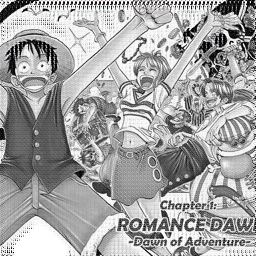

Output

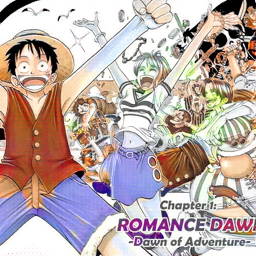

Real

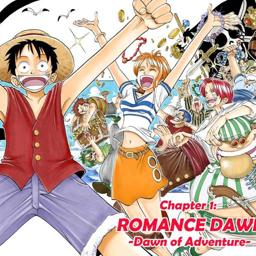